# Project name --> 🏠 House Price Estimator!

##  Building Linear Rregression model Using all  "Advanced Regression Techniques" 

### Datastes    = Indian Real Estate Dataset  from (Kaggel)

### importing requred libraries

In [197]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso , Ridge  # two models
from sklearn.preprocessing import PolynomialFeatures  # preprocessing 
from sklearn.metrics import mean_absolute_error, r2_score

### Data Exploring

In [198]:
# Loading datasets
file_path = r"C:\Users\Ravichandran\OneDrive\Desktop\cleaned_crime_dataset.csv123"
house_data = pd.read_csv(file_path)
house_data = house_data.copy()


C:\Users\Ravichandran\AppData\Local\Temp\ipykernel_9936\3409123842.py:3: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  house_data = pd.read_csv(file_path)


In [199]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27798 entries, 0 to 27797
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROP_ID                     27798 non-null  object 
 1   PREFERENCE                  27798 non-null  object 
 2   DESCRIPTION                 27798 non-null  object 
 3   PROPERTY_TYPE               27798 non-null  object 
 4   CITY                        27798 non-null  object 
 5   TRANSACT_TYPE               21836 non-null  float64
 6   OWNTYPE                     27798 non-null  int64  
 7   BEDROOM_NUM                 24437 non-null  float64
 8   PRICE_PER_UNIT_AREA         27798 non-null  float64
 9   FURNISH                     27798 non-null  int64  
 10  FACING                      27798 non-null  int64  
 11  AGE                         27798 non-null  int64  
 12  TOTAL_FLOOR                 27153 non-null  float64
 13  FEATURES                    277

In [200]:
house_data.describe()

,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,FACING,AGE,TOTAL_FLOOR,PRICE_SQFT,TOTAL_LANDMARK_COUNT,...,POSTING_DATE,UPDATE_DATE,PROPERTY_NUMBER,MIN_PRICE,MAX_PRICE,PROJ_ID,BUILDING_ID,MIN_AREA_SQFT,MAX_AREA_SQFT,PROPERTY_TYPE__U
count,21836.000000,27798.000000,24437.000000,2.779800e+04,27798.000000,27798.000000,27798.000000,27153.000000,2.779800e+04,25723.000000,...,1.834800e+04,1.900100e+04,19001.000000,1.900100e+04,1.900100e+04,19001.000000,1.900100e+04,19001.000000,19001.000000,19001.000000
mean,1.299597,0.871969,2.623767,1.451749e+05,1.486366,2.592129,3.100367,15.003756,1.451552e+05,26.824321,...,1.688382e+12,1.690693e+12,1.560234,1.784551e+07,1.890868e+07,131126.724699,3.452197e+05,362.225194,368.556610,2.279301
std,0.458092,0.607757,1.695238,5.129011e+06,1.433947,2.373342,2.192568,14.261159,5.129010e+06,18.173518,...,5.594060e+09,2.462568e+09,2.128495,4.939898e+07,5.106954e+07,160291.395905,4.313705e+05,7932.763638,7932.886861,8.343402
min,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,...,1.652809e+12,1.665146e+12,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.393545,1.393545,1.000000
25%,1.000000,1.000000,2.000000,2.479000e+03,0.000000,0.000000,1.000000,4.000000,2.479000e+03,11.000000,...,1.688026e+12,1.689766e+12,1.000000,1.175854e+06,1.199888e+06,0.000000,0.000000e+00,68.376608,71.999825,1.000000
50%,1.000000,1.000000,3.000000,6.961000e+03,2.000000,3.000000,3.000000,10.000000,6.960000e+03,15.000000,...,1.690138e+12,1.691224e+12,1.000000,8.150001e+06,8.500000e+06,13456.000000,5.553200e+04,118.730034,120.773900,1.000000
75%,2.000000,1.000000,3.000000,1.704225e+04,2.000000,4.000000,5.000000,22.000000,1.704000e+04,49.000000,...,1.691568e+12,1.692347e+12,1.000000,1.900000e+07,2.000000e+07,300381.000000,7.882260e+05,167.225400,170.569908,2.000000
max,2.000000,4.000000,77.000000,6.000000e+08,4.000000,8.000000,6.000000,117.000000,6.000000e+08,50.000000,...,1.693026e+12,1.693027e+12,41.000000,2.147484e+09,2.147484e+09,413891.000000,1.125563e+06,728433.842400,728433.842400,90.000000


In [201]:
house_data.shape

(27798, 61)

In [202]:
house_data.head()

,PROP_ID,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,...,TOP_USPS,EXPIRY_DATE,PROPERTY_TYPE__U,SECONDARY_AREA,VALUE_LABEL,CLASS_HEADING,CLASS_LABEL,REGISTER_DATE__U,REGISTERED_DAYS,PRIMARY_TAGS
0,Y71306776,S,Book your 2 BHK flat in Srijan Star Swapno Pur...,Residential Apartment,Kolkata South,2.0,1,2.0,3662.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B70113976,S,Make Natural Quest your next home. This projec...,Residential Apartment,Kolkata South,2.0,1,3.0,10500.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,O70374510,S,"Book your 3 BHK apartment in Garia, Kolkata So...",Residential Apartment,Kolkata South,2.0,1,3.0,8900.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Q69170182,S,"Dev bhumi in joka, kolkata south by ocean land...",Residential Land,Kolkata South,2.0,1,NaN,208.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F69917588,S,Let your dream of owning a flat come true with...,Residential Apartment,Kolkata South,2.0,1,3.0,5215.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Droping null values and unwnanted columns

In [203]:
house_data.isnull().sum().to_dict()

{'PROP_ID': 0,
 'PREFERENCE': 0,
 'DESCRIPTION': 0,
 'PROPERTY_TYPE': 0,
 'CITY': 0,
 'TRANSACT_TYPE': 5962,
 'OWNTYPE': 0,
 'BEDROOM_NUM': 3361,
 'PRICE_PER_UNIT_AREA': 0,
 'FURNISH': 0,
 'FACING': 0,
 'AGE': 0,
 'TOTAL_FLOOR': 645,
 'FEATURES': 0,
 'PROP_NAME': 3449,
 'PRICE_SQFT': 0,
 'MAP_DETAILS': 0,
 'AMENITIES': 7933,
 'AREA': 0,
 'PRICE': 0,
 'PROP_HEADING': 0,
 'SECONDARY_TAGS': 0,
 'TOTAL_LANDMARK_COUNT': 2075,
 'FORMATTED_LANDMARK_DETAILS': 2075,
 'SOCIETY_NAME': 3449,
 'BUILDING_NAME': 3462,
 'location': 0,
 'BALCONY_NUM': 9794,
 'FLOOR_NUM': 5621,
 'CARPET_SQFT': 25309,
 'SUPERBUILTUP_SQFT': 22398,
 'BUILTUP_SQFT': 26118,
 'SUPER_AREA': 26978,
 'SUPERAREA_UNIT': 26978,
 'SUPER_SQFT': 26965,
 'SPID': 8797,
 'REGISTER_DATE': 8797,
 'POSTING_DATE': 9450,
 'UPDATE_DATE': 8797,
 'CLASS': 8797,
 'RES_COM': 8797,
 'PROPERTY_NUMBER': 8797,
 'MIN_PRICE': 8797,
 'MAX_PRICE': 8797,
 'PROJ_ID': 8797,
 'BUILDING_ID': 8797,
 'VERIFIED': 8797,
 'MIN_AREA_SQFT': 8797,
 'MAX_AREA_SQFT': 87

In [204]:
# droping existing columns and Similar columns
 
house_data.drop(['PROP_ID','PREFERENCE','DESCRIPTION','TRANSACT_TYPE','TRANSACT_TYPE','PRICE_PER_UNIT_AREA','FEATURES',
                 'PROP_NAME','AMENITIES','PROP_HEADING','SECONDARY_TAGS','FORMATTED_LANDMARK_DETAILS','BUILDING_NAME','CARPET_SQFT',
                 'SUPERBUILTUP_SQFT','BUILTUP_SQFT','SUPER_AREA','SPID','REGISTER_DATE', 'POSTING_DATE', 'UPDATE_DATE','RES_COM',
                 'PROPERTY_NUMBER','PROJ_ID','BUILDING_ID','VERIFIED', 'MIN_AREA_SQFT','MAX_AREA_SQFT','ALT_TAG', 'PRODUCT_TYPE', 'TOP_USPS', 'EXPIRY_DATE',
                 'PROPERTY_TYPE__U', 'SECONDARY_AREA','CLASS', 'VALUE_LABEL','PRICE_SQFT', 'PRICE','SUPERAREA_UNIT','CLASS_HEADING','CLASS_LABEL', 'REGISTER_DATE__U', 'REGISTERED_DAYS', 
                 'PRIMARY_TAGS','SUPER_SQFT' ],axis=1, inplace=True)                                                                                                                                                                                           

In [205]:
house_data['LOCATION'] = house_data['location']
house_data.drop(['location'], axis=1 , inplace=True)

In [206]:
house_data

,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,MAP_DETAILS,AREA,TOTAL_LANDMARK_COUNT,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,MIN_PRICE,MAX_PRICE,LOCATION
0,Residential Apartment,Kolkata South,1,2.0,0,0,5,3.0,"{'LATITUDE': '22.364447', 'LONGITUDE': '88.274...",518-623 sq.ft.,2.0,Srijan Star Swapno Puron,NaN,1,NaN,NaN,"{'CITY': '27', 'CITY_NAME': 'Kolkata South', '..."
1,Residential Apartment,Kolkata South,1,3.0,0,0,5,11.0,"{'LATITUDE': '22.518795', 'LONGITUDE': '88.388...",1110-1121 sq.ft.,9.0,Natural Quest,NaN,1,NaN,NaN,"{'CITY': '27', 'CITY_NAME': 'Kolkata South', '..."
2,Residential Apartment,Kolkata South,1,3.0,0,0,5,20.0,"{'LATITUDE': '22.5137646', 'LONGITUDE': '88.36...",1376-1516 sq.ft.,6.0,Ganguly 4Sight Eminence,NaN,1,NaN,NaN,"{'CITY': '27', 'CITY_NAME': 'Kolkata South', '..."
3,Residential Land,Kolkata South,1,NaN,0,0,0,0.0,"{'LATITUDE': '22.45383', 'LONGITUDE': '88.2495...",720-2880 sq.ft.,13.0,Dev Bhumi,NaN,NaN,NaN,NaN,"{'CITY': '27', 'CITY_NAME': 'Kolkata South', '..."
4,Residential Apartment,Kolkata South,1,3.0,0,0,5,19.0,"{'LATITUDE': '22.44213', 'LONGITUDE': '88.29551'}",1130-1460 sq.ft.,11.0,DTC Sojon,NaN,1,NaN,NaN,"{'CITY': '27', 'CITY_NAME': 'Kolkata South', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27793,Residential Land,Hyderabad,1,NaN,0,3,0,NaN,"{'LATITUDE': '17.4639176', 'LONGITUDE': '78.62...",1503 sq.ft.,10.0,NaN,NaN,NaN,3173000.0,3173000.0,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI..."
27794,Residential Land,Hyderabad,1,NaN,0,3,0,NaN,"{'LATITUDE': '16.985875', 'LONGITUDE': '78.499...",2700 sq.ft.,NaN,NaN,NaN,NaN,3300000.0,3300000.0,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI..."
27795,Independent/Builder Floor,Secunderabad,0,2.0,4,3,1,3.0,"{'LATITUDE': '17.4653875', 'LONGITUDE': '78.47...",1000 sq.ft.,50.0,NaN,1.0,1,15000.0,15000.0,"{'CITY': '268', 'CITY_NAME': 'Secunderabad', '..."
27796,Residential Apartment,Hyderabad,1,3.0,2,3,5,5.0,"{'LATITUDE': '17.47078', 'LONGITUDE': '78.30668'}",1600 sq.ft.,50.0,Greenwoods Project,2.0,4,10240000.0,10240000.0,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI..."


In [207]:
house_data.columns

Index(['PROPERTY_TYPE', 'CITY', 'OWNTYPE', 'BEDROOM_NUM', 'FURNISH', 'FACING',
       'AGE', 'TOTAL_FLOOR', 'MAP_DETAILS', 'AREA', 'TOTAL_LANDMARK_COUNT',
       'SOCIETY_NAME', 'BALCONY_NUM', 'FLOOR_NUM', 'MIN_PRICE', 'MAX_PRICE',
       'LOCATION'],
      dtype='object')

In [208]:
house_data.isnull().sum()

PROPERTY_TYPE              0
CITY                       0
OWNTYPE                    0
BEDROOM_NUM             3361
FURNISH                    0
FACING                     0
AGE                        0
TOTAL_FLOOR              645
MAP_DETAILS                0
AREA                       0
TOTAL_LANDMARK_COUNT    2075
SOCIETY_NAME            3449
BALCONY_NUM             9794
FLOOR_NUM               5621
MIN_PRICE               8797
MAX_PRICE               8797
LOCATION                   0
dtype: int64

In [209]:
house_data.dropna(subset=['BALCONY_NUM','FLOOR_NUM', 'MIN_PRICE','MAX_PRICE','SOCIETY_NAME','TOTAL_LANDMARK_COUNT'], axis=0, inplace=True)


In [210]:
house_data

,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,MAP_DETAILS,AREA,TOTAL_LANDMARK_COUNT,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,MIN_PRICE,MAX_PRICE,LOCATION
8799,Residential Apartment,Thane,0,1.0,1,3,3,7.0,"{'LATITUDE': '19.22071', 'LONGITUDE': '72.9867...",390 sq.ft.,49.0,Highway Darshan,1.0,1.0,20000.0,20000.0,"{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDIN..."
8800,Residential Apartment,Thane,0,4.0,1,0,6,17.0,"{'LATITUDE': '19.267984', 'LONGITUDE': '72.970...",1250 sq.ft.,39.0,"Terraform Petunia, G Corp",2.0,11.0,8000.0,8000.0,"{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDIN..."
8801,Residential Apartment,Thane,0,4.0,1,0,6,30.0,"{'LATITUDE': '19.25756', 'LONGITUDE': '72.98296'}",1250 sq.ft.,50.0,nul,2.0,25.0,8000.0,8000.0,"{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDIN..."
8803,Residential Apartment,Navi Mumbai,0,2.0,1,5,2,3.0,"{'LATITUDE': '19.029645', 'LONGITUDE': '73.020...",850 sq.ft.,50.0,Vintage Paying PG,2.0,2.0,6000.0,6000.0,"{'CITY': '15', 'CITY_NAME': 'Navi Mumbai', 'BU..."
8805,Residential Apartment,Mumbai Beyond Thane,0,3.0,1,0,1,22.0,"{'LATITUDE': '19.268855', 'LONGITUDE': '73.045...",1600 sq.ft.,14.0,Bhiwandi Tata mantra,3.0,13.0,5000.0,5000.0,"{'CITY': '274', 'CITY_NAME': 'Mumbai Beyond Th..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27753,Residential Apartment,Hyderabad,0,2.0,4,3,1,5.0,"{'LATITUDE': '17.427164', 'LONGITUDE': '78.443...",1251 sq.ft.,48.0,somajiguda,1.0,1,14500.0,14500.0,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI..."
27754,Studio Apartment,Hyderabad,0,1.0,4,3,1,5.0,"{'LATITUDE': '17.424037', 'LONGITUDE': '78.450...",650 sq.ft.,49.0,Shanta Sriram Panjagutta,1.0,5,5500.0,5500.0,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI..."
27755,Residential Apartment,Hyderabad,0,1.0,4,3,1,5.0,"{'LATITUDE': '17.427164', 'LONGITUDE': '78.443...",780 sq.ft.,48.0,kgn,1.0,3,8000.0,8000.0,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI..."
27796,Residential Apartment,Hyderabad,1,3.0,2,3,5,5.0,"{'LATITUDE': '17.47078', 'LONGITUDE': '78.30668'}",1600 sq.ft.,50.0,Greenwoods Project,2.0,4,10240000.0,10240000.0,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI..."


In [211]:
house_data.isnull().sum()

PROPERTY_TYPE           0
CITY                    0
OWNTYPE                 0
BEDROOM_NUM             0
FURNISH                 0
FACING                  0
AGE                     0
TOTAL_FLOOR             0
MAP_DETAILS             0
AREA                    0
TOTAL_LANDMARK_COUNT    0
SOCIETY_NAME            0
BALCONY_NUM             0
FLOOR_NUM               0
MIN_PRICE               0
MAX_PRICE               0
LOCATION                0
dtype: int64

In [212]:
house_data.shape

(9112, 17)

### Data Visualisation

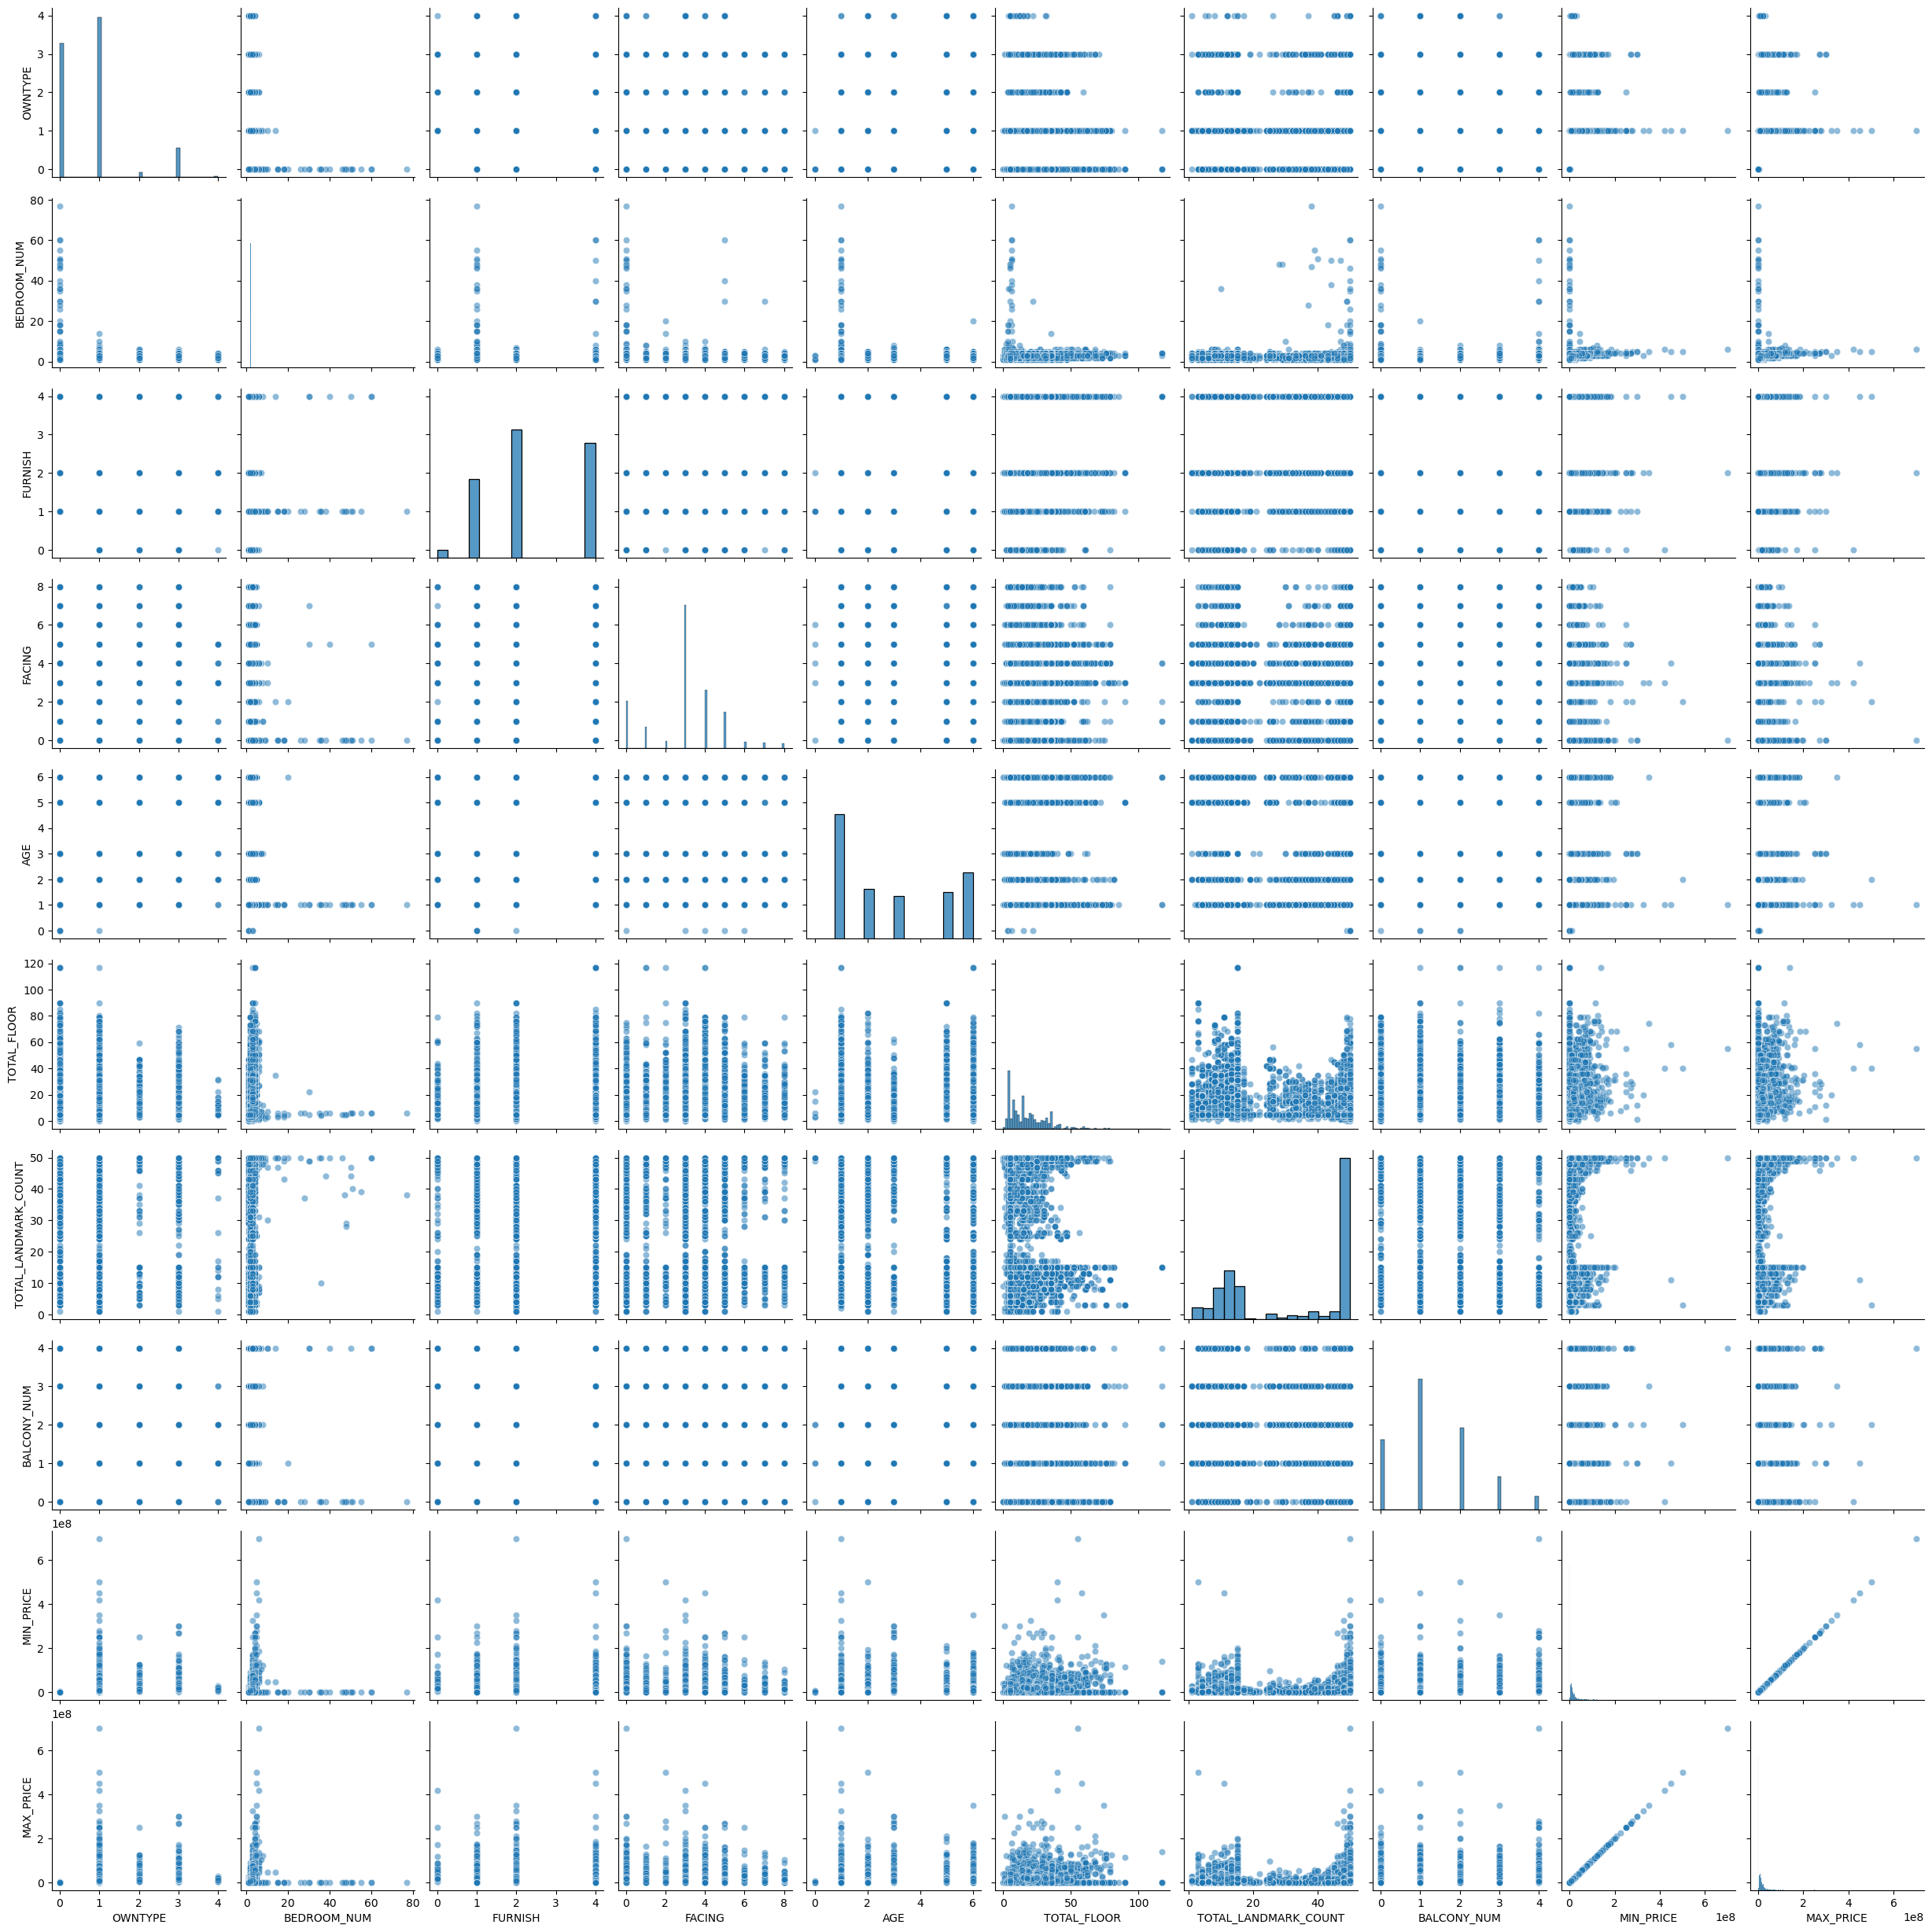

In [213]:
# comparing all numrical values at the same time 
sns.pairplot(house_data, kind='scatter' , plot_kws={'alpha':0.5})

In [214]:
house_data.head()

,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,MAP_DETAILS,AREA,TOTAL_LANDMARK_COUNT,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,MIN_PRICE,MAX_PRICE,LOCATION
8799,Residential Apartment,Thane,0,1.0,1,3,3,7.0,"{'LATITUDE': '19.22071', 'LONGITUDE': '72.9867...",390 sq.ft.,49.0,Highway Darshan,1.0,1.0,20000.0,20000.0,"{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDIN..."
8800,Residential Apartment,Thane,0,4.0,1,0,6,17.0,"{'LATITUDE': '19.267984', 'LONGITUDE': '72.970...",1250 sq.ft.,39.0,"Terraform Petunia, G Corp",2.0,11.0,8000.0,8000.0,"{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDIN..."
8801,Residential Apartment,Thane,0,4.0,1,0,6,30.0,"{'LATITUDE': '19.25756', 'LONGITUDE': '72.98296'}",1250 sq.ft.,50.0,nul,2.0,25.0,8000.0,8000.0,"{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDIN..."
8803,Residential Apartment,Navi Mumbai,0,2.0,1,5,2,3.0,"{'LATITUDE': '19.029645', 'LONGITUDE': '73.020...",850 sq.ft.,50.0,Vintage Paying PG,2.0,2.0,6000.0,6000.0,"{'CITY': '15', 'CITY_NAME': 'Navi Mumbai', 'BU..."
8805,Residential Apartment,Mumbai Beyond Thane,0,3.0,1,0,1,22.0,"{'LATITUDE': '19.268855', 'LONGITUDE': '73.045...",1600 sq.ft.,14.0,Bhiwandi Tata mantra,3.0,13.0,5000.0,5000.0,"{'CITY': '274', 'CITY_NAME': 'Mumbai Beyond Th..."


In [215]:
house_data.dtypes

PROPERTY_TYPE            object
CITY                     object
OWNTYPE                   int64
BEDROOM_NUM             float64
FURNISH                   int64
FACING                    int64
AGE                       int64
TOTAL_FLOOR             float64
MAP_DETAILS              object
AREA                     object
TOTAL_LANDMARK_COUNT    float64
SOCIETY_NAME             object
BALCONY_NUM             float64
FLOOR_NUM                object
MIN_PRICE               float64
MAX_PRICE               float64
LOCATION                 object
dtype: object

In [216]:
# Identify Column Types and checking each columns unique values present in datasets

categorical_cols = house_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}: {house_data[col].nunique()} unique values") # gives total numbers of unique values
    print(house_data[col].value_counts().head()) # gives how many values holds each unique data 



PROPERTY_TYPE: 4 unique values
PROPERTY_TYPE
Residential Apartment        8890
Studio Apartment              116
Serviced Apartments            76
Independent/Builder Floor      30
Name: count, dtype: int64

CITY: 11 unique values
CITY
Hyderabad                 3996
Mumbai Andheri-Dahisar    1053
Navi Mumbai                909
Central Mumbai suburbs     815
Thane                      814
Name: count, dtype: int64

MAP_DETAILS: 3672 unique values
MAP_DETAILS
{'LATITUDE': '17.4359437', 'LONGITUDE': '78.3416731'}    243
{'LATITUDE': '17.4609913', 'LONGITUDE': '78.3532083'}    238
{'LATITUDE': '17.40223', 'LONGITUDE': '78.3444'}         142
{'LATITUDE': '17.47078', 'LONGITUDE': '78.30668'}        140
{'LATITUDE': '17.3923634', 'LONGITUDE': '78.3621784'}    127
Name: count, dtype: int64

AREA: 1499 unique values
AREA
1200 sq.ft.    221
1100 sq.ft.    190
1000 sq.ft.    160
650 sq.ft.     128
1250 sq.ft.    124
Name: count, dtype: int64

SOCIETY_NAME: 4285 unique values
SOCIETY_NAME
Prestig

In [217]:
# Handling  Mixed Data Types (like "34sqt feet")

def clean_area_column(col):
    #Extract numbers from mixed strings
    if col.dtype=='object':
             # Extract only numbers, handle NaN
        return  pd.to_numeric(col.str.extract('(\d+)')[0], errors='coerce')
    return col

# Applling  to messy columns  
house_data['AREA'] = clean_area_column(house_data['AREA'])
                           

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Ravichandran\AppData\Local\Temp\ipykernel_9936\1240754852.py:7: SyntaxWarning: invalid escape sequence '\d'
  return  pd.to_numeric(col.str.extract('(\d+)')[0], errors='coerce')


In [218]:
house_data['AREA'] # converted to numeric

8799      390
8800     1250
8801     1250
8803      850
8805     1600
         ... 
27753    1251
27754     650
27755     780
27796    1600
27797    1220
Name: AREA, Length: 9112, dtype: int64

In [219]:
# Taking MAP_DETAILS which values are in dict(string) format not in dict
# so i am making separates of latitude and longitude and conerting inti dictionary

import ast
# Converting string to dictionary using 'ast.literal_eval'

def extract_lat(MAP_DETAILS):  # giving variable name for parameter to call map_details
    try:
        data = ast.literal_eval(MAP_DETAILS)
        return float(data['LATITUDE'])
    except Exception:
        return None

def extract_lon(MAP_DETAILS):
    try:
        data = ast.literal_eval(MAP_DETAILS)
        return float(data['LONGITUDE'])
    except Exception:
        return None
    
  ### Applling the functions to extract new columns
house_data['LATITUDE'] = house_data['MAP_DETAILS'].apply(extract_lat)
house_data['LONGITUDE'] = house_data['MAP_DETAILS'].apply(extract_lon)

In [220]:
house_data.drop(['MAP_DETAILS'], axis=1 , inplace=True)

In [221]:
house_data.head()

,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,AREA,TOTAL_LANDMARK_COUNT,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,MIN_PRICE,MAX_PRICE,LOCATION,LATITUDE,LONGITUDE
8799,Residential Apartment,Thane,0,1.0,1,3,3,7.0,390,49.0,Highway Darshan,1.0,1.0,20000.0,20000.0,"{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDIN...",19.220710,72.986786
8800,Residential Apartment,Thane,0,4.0,1,0,6,17.0,1250,39.0,"Terraform Petunia, G Corp",2.0,11.0,8000.0,8000.0,"{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDIN...",19.267984,72.970973
8801,Residential Apartment,Thane,0,4.0,1,0,6,30.0,1250,50.0,nul,2.0,25.0,8000.0,8000.0,"{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDIN...",19.257560,72.982960
8803,Residential Apartment,Navi Mumbai,0,2.0,1,5,2,3.0,850,50.0,Vintage Paying PG,2.0,2.0,6000.0,6000.0,"{'CITY': '15', 'CITY_NAME': 'Navi Mumbai', 'BU...",19.029645,73.020627
8805,Residential Apartment,Mumbai Beyond Thane,0,3.0,1,0,1,22.0,1600,14.0,Bhiwandi Tata mantra,3.0,13.0,5000.0,5000.0,"{'CITY': '274', 'CITY_NAME': 'Mumbai Beyond Th...",19.268855,73.045851


In [222]:
print(house_data['LOCATION'].head(3).tolist())


["{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDING_ID': '412496', 'BUILDING_NAME': 'Highway Darshan', 'SOCIETY_NAME': 'Highway Darshan', 'LOCALITY_ID': '1107', 'LOCALITY_NAME': 'Thane West', 'ADDRESS': '102, Shivanand Chs, Teen Hath Naka'}", "{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDING_ID': '0', 'BUILDING_NAME': 'Terraform Petunia, G Corp ', 'SOCIETY_NAME': 'Terraform Petunia, G Corp ', 'LOCALITY_ID': '1131', 'LOCALITY_NAME': 'Kasar vadavali', 'ADDRESS': '1501'}", "{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDING_ID': '0', 'BUILDING_NAME': 'nul', 'SOCIETY_NAME': 'nul', 'LOCALITY_ID': '5102', 'LOCALITY_NAME': 'Hiranandani Estate', 'ADDRESS': None}"]


In [223]:
# its in dict in list
# Extracting Location values and leaving unwanted values 
import ast
# Converting string to list of dict
def safe_parse(x):
    try:
        parsed = ast.literal_eval(x)
        if isinstance(parsed, dict):
            return [parsed]  # its wraps dict in list
        elif isinstance(parsed, list):
            return parsed
        else:
            return []
    except Exception:
        return []

# Apply the fix
house_data['LOCATION'] = house_data['LOCATION'].apply(safe_parse)


# Reapeating orginal row for each location dict
house_data = house_data.explode('LOCATION')  # explode() If one row had multiple location dictionaries,  this splits that row into multiple rows one per location.

# Extracting values from the dict
house_data['LOCALITY_ID'] = house_data['LOCATION'].apply(
    lambda loc_dict: loc_dict.get('LOCALITY_ID') if isinstance(loc_dict, dict) else None)

house_data['LOCALITY_NAME'] = house_data['LOCATION'].apply(
    lambda loc_dict: loc_dict.get('LOCALITY_NAME') if isinstance(loc_dict, dict) else None)

house_data['ADDRESS'] = house_data['LOCATION'].apply(
    lambda loc_dict: loc_dict.get('ADDRESS') if isinstance(loc_dict, dict) else None)

# Removing existing Location column
house_data.drop(['LOCATION'], axis=1 , inplace=True)

In [224]:
house_data.head()

,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,AREA,TOTAL_LANDMARK_COUNT,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,MIN_PRICE,MAX_PRICE,LATITUDE,LONGITUDE,LOCALITY_ID,LOCALITY_NAME,ADDRESS
8799,Residential Apartment,Thane,0,1.0,1,3,3,7.0,390,49.0,Highway Darshan,1.0,1.0,20000.0,20000.0,19.220710,72.986786,1107,Thane West,"102, Shivanand Chs, Teen Hath Naka"
8800,Residential Apartment,Thane,0,4.0,1,0,6,17.0,1250,39.0,"Terraform Petunia, G Corp",2.0,11.0,8000.0,8000.0,19.267984,72.970973,1131,Kasar vadavali,1501
8801,Residential Apartment,Thane,0,4.0,1,0,6,30.0,1250,50.0,nul,2.0,25.0,8000.0,8000.0,19.257560,72.982960,5102,Hiranandani Estate,None
8803,Residential Apartment,Navi Mumbai,0,2.0,1,5,2,3.0,850,50.0,Vintage Paying PG,2.0,2.0,6000.0,6000.0,19.029645,73.020627,21757,Sector 21 Nerul,Monil Cottage
8805,Residential Apartment,Mumbai Beyond Thane,0,3.0,1,0,1,22.0,1600,14.0,Bhiwandi Tata mantra,3.0,13.0,5000.0,5000.0,19.268855,73.045851,1116,Bhiwandi,None


In [225]:
house_data.isnull().sum()

PROPERTY_TYPE              0
CITY                       0
OWNTYPE                    0
BEDROOM_NUM                0
FURNISH                    0
FACING                     0
AGE                        0
TOTAL_FLOOR                0
AREA                       0
TOTAL_LANDMARK_COUNT       0
SOCIETY_NAME               0
BALCONY_NUM                0
FLOOR_NUM                  0
MIN_PRICE                  0
MAX_PRICE                  0
LATITUDE                   0
LONGITUDE                  0
LOCALITY_ID                0
LOCALITY_NAME              0
ADDRESS                 6077
dtype: int64

In [226]:
house_data['ADDRESS'] = house_data['ADDRESS'].fillna('unkown')

In [227]:
print("ADDRESS have",house_data['ADDRESS'].isnull().sum(),"null values")

ADDRESS have 0 null values


In [231]:
# making Avarage of MIN_PRICE	MAX_PRICE 
house_data['AVERAGE_PRICE'] = house_data['MIN_PRICE']+house_data['MAX_PRICE']/2

# Droping Existing MIN_PRICE	MAX_PRICE 
house_data.drop(['MIN_PRICE',	'MAX_PRICE'], axis=1 , inplace=True)

In [232]:
house_data

,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,AREA,TOTAL_LANDMARK_COUNT,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LONGITUDE,LOCALITY_ID,LOCALITY_NAME,ADDRESS,AVERAGE_PRICE
8799,Residential Apartment,Thane,0,1.0,1,3,3,7.0,390,49.0,Highway Darshan,1.0,1.0,19.220710,72.986786,1107,Thane West,"102, Shivanand Chs, Teen Hath Naka",30000.0
8800,Residential Apartment,Thane,0,4.0,1,0,6,17.0,1250,39.0,"Terraform Petunia, G Corp",2.0,11.0,19.267984,72.970973,1131,Kasar vadavali,1501,12000.0
8801,Residential Apartment,Thane,0,4.0,1,0,6,30.0,1250,50.0,nul,2.0,25.0,19.257560,72.982960,5102,Hiranandani Estate,unkown,12000.0
8803,Residential Apartment,Navi Mumbai,0,2.0,1,5,2,3.0,850,50.0,Vintage Paying PG,2.0,2.0,19.029645,73.020627,21757,Sector 21 Nerul,Monil Cottage,9000.0
8805,Residential Apartment,Mumbai Beyond Thane,0,3.0,1,0,1,22.0,1600,14.0,Bhiwandi Tata mantra,3.0,13.0,19.268855,73.045851,1116,Bhiwandi,unkown,7500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27753,Residential Apartment,Hyderabad,0,2.0,4,3,1,5.0,1251,48.0,somajiguda,1.0,1,17.427164,78.443750,5537,Somajiguda,3-54,21750.0
27754,Studio Apartment,Hyderabad,0,1.0,4,3,1,5.0,650,49.0,Shanta Sriram Panjagutta,1.0,5,17.424037,78.450561,993,Panjagutta,unkown,8250.0
27755,Residential Apartment,Hyderabad,0,1.0,4,3,1,5.0,780,48.0,kgn,1.0,3,17.427164,78.443750,5537,Somajiguda,2-33,12000.0
27796,Residential Apartment,Hyderabad,1,3.0,2,3,5,5.0,1600,50.0,Greenwoods Project,2.0,4,17.470780,78.306680,5769,Nallagandla,401,15360000.0


In [ ]:
# checking all columns  is a categorical or binary classification or proportions
house_data['PROPERTY_TYPE'].value_counts(normalize=True)



PROPERTY_TYPE
Residential Apartment        0.975637
Studio Apartment             0.012730
Serviced Apartments          0.008341
Independent/Builder Floor    0.003292
Name: proportion, dtype: float64

In [236]:
house_data

,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,AREA,TOTAL_LANDMARK_COUNT,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LONGITUDE,LOCALITY_ID,LOCALITY_NAME,ADDRESS,AVERAGE_PRICE
8799,Residential Apartment,Thane,0,1.0,1,3,3,7.0,390,49.0,Highway Darshan,1.0,1.0,19.220710,72.986786,1107,Thane West,"102, Shivanand Chs, Teen Hath Naka",30000.0
8800,Residential Apartment,Thane,0,4.0,1,0,6,17.0,1250,39.0,"Terraform Petunia, G Corp",2.0,11.0,19.267984,72.970973,1131,Kasar vadavali,1501,12000.0
8801,Residential Apartment,Thane,0,4.0,1,0,6,30.0,1250,50.0,nul,2.0,25.0,19.257560,72.982960,5102,Hiranandani Estate,unkown,12000.0
8803,Residential Apartment,Navi Mumbai,0,2.0,1,5,2,3.0,850,50.0,Vintage Paying PG,2.0,2.0,19.029645,73.020627,21757,Sector 21 Nerul,Monil Cottage,9000.0
8805,Residential Apartment,Mumbai Beyond Thane,0,3.0,1,0,1,22.0,1600,14.0,Bhiwandi Tata mantra,3.0,13.0,19.268855,73.045851,1116,Bhiwandi,unkown,7500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27753,Residential Apartment,Hyderabad,0,2.0,4,3,1,5.0,1251,48.0,somajiguda,1.0,1,17.427164,78.443750,5537,Somajiguda,3-54,21750.0
27754,Studio Apartment,Hyderabad,0,1.0,4,3,1,5.0,650,49.0,Shanta Sriram Panjagutta,1.0,5,17.424037,78.450561,993,Panjagutta,unkown,8250.0
27755,Residential Apartment,Hyderabad,0,1.0,4,3,1,5.0,780,48.0,kgn,1.0,3,17.427164,78.443750,5537,Somajiguda,2-33,12000.0
27796,Residential Apartment,Hyderabad,1,3.0,2,3,5,5.0,1600,50.0,Greenwoods Project,2.0,4,17.470780,78.306680,5769,Nallagandla,401,15360000.0


In [258]:
house_data['FLOOR_NUM'].value_counts(50)

FLOOR_NUM
3     0.111940
2     0.096466
4     0.085162
1     0.075176
5     0.072542
        ...   
62    0.000110
70    0.000110
76    0.000110
77    0.000110
56    0.000110
Name: proportion, Length: 79, dtype: float64